This script implements the static beam equation to a cantilevered beam

h - Beam Height - [m]<br>
b - Beam Width - [m]<br>
L - Beam Length - [m]<br>
x - Local Position - [m]<br>
I - Second Moment of Area - [mm<sup>4</sup>]<br>
E - Young's Modulus - [Pa]<br>
q - Distributed Load - [N/m]<br>
V<sub>p</sub> - Magnitude of Point Loads - [N]<br>
L<sub>p</sub> - Position of Point Loads - [m]<br>
V - Shear Force - [N]<br>
M - Bending Moment - [N*m]<br>
Y - Deflection - [m]<br>

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
# importing beam data
data = pd.read_csv('beam.csv')
print(data, '\n\n', data.describe())

    x - [m]      I - [m4]  q - [N/m]  Vp - [N]
0      0.00  8.330000e-10      -0.50       0.0
1      0.05  8.330000e-10      -0.50       0.0
2      0.10  8.330000e-10      -0.50       0.0
3      0.15  8.330000e-10      -0.50       0.0
4      0.20  8.330000e-10      -0.50       0.0
5      0.25  8.330000e-10      -0.50       0.0
6      0.30  8.330000e-10      -0.50       0.0
7      0.35  4.170000e-10      -0.50      -5.0
8      0.40  4.170000e-10      -0.75       0.0
9      0.45  4.170000e-10      -0.75       0.0
10     0.50  4.170000e-10      -0.75       0.0
11     0.55  4.170000e-10      -0.75       0.0
12     0.60  4.170000e-10      -0.75       0.0
13     0.65  4.170000e-10      -0.75       0.0
14     0.70  4.170000e-10      -0.75      -2.5
15     0.75  4.170000e-10      -0.25       0.0
16     0.80  4.170000e-10      -0.25       0.0
17     0.85  4.170000e-10      -0.25       0.0
18     0.90  4.170000e-10      -0.25       0.0
19     0.95  4.170000e-10      -0.25       0.0
20     1.00  

In [131]:
# Beam Properties
x = np.array(data['x - [m]'])
I = np.array(data['I - [m4]'])
E = 180e9

In [132]:
# Loading
q = np.array(data['q - [N/m]'])
Vp = np.array(data['Vp - [N]'])

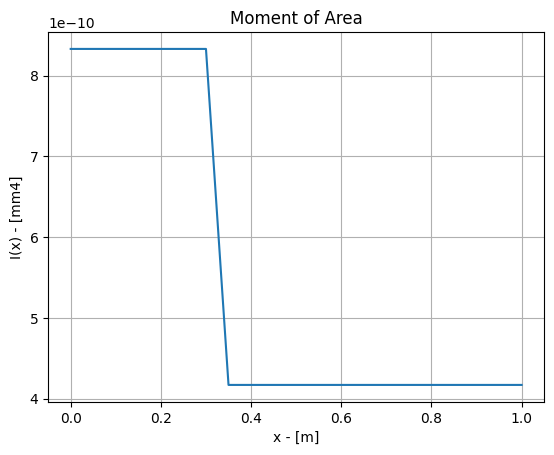

In [133]:
# Plot - Moment of Area
plt.plot(x, I)
plt.title('Moment of Area')
plt.xlabel('x - [m]')
plt.ylabel('I(x) - [mm4]')
plt.grid(True)

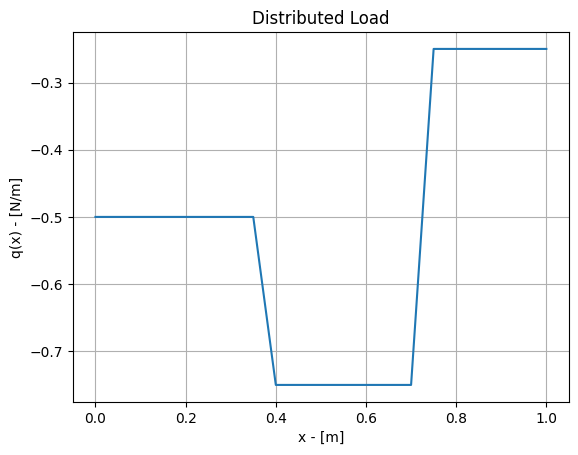

In [134]:
# Plot - Distributed Load
plt.plot(x, q)
plt.title('Distributed Load')
plt.xlabel('x - [m]')
plt.ylabel('q(x) - [N/m]')
plt.grid(True)

In [135]:
def integrate_distributed_load(x, q, V, tol=1e-10):
    """ Shear Force - Distributed Load - Cantilever - Finite Difference Scheme"""
    ea_V = 1
    while ea_V > tol:
        V_1 = V.sum()
        V[0:-1] = V[1:] + q[0:-1] * (x[1] - x[0])
        ea_V = (V.sum() - V_1) / (V.sum())
        ea_V = np.abs(ea_V)         
    return V

In [136]:
def add_point_loads(V, Vp):
    """Shear Force - Point Loads"""
    Vp_new = np.zeros_like(Vp)
    for i in range(0, Vp.size):
        V[i] += sum(Vp) - sum(Vp[:i])
    return V

In [137]:
# Shear force
V = np.zeros(x.size)
V = integrate_distributed_load(x, q, V)
V = add_point_loads(V, Vp)

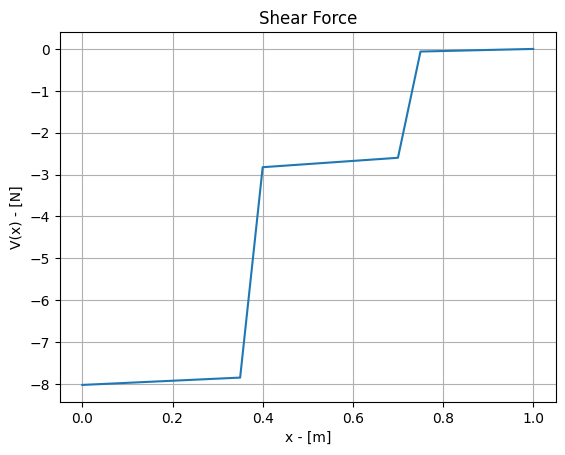

In [138]:
# Plot - Shear Force
plt.plot(x, V)
plt.title('Shear Force')
plt.xlabel('x - [m]')
plt.ylabel('V(x) - [N]')
plt.grid(True)

In [139]:
def integrate_shear_force(x, V, tol=1e-10):
    """Bending Moment - Cantilever - Finite Difference Scheme"""
    M = np.zeros(x.size)
    ea_M = 1
    while ea_M > tol:
        M_1 = M.sum()
        M[0:-1] = M[1:] - V[0:-1] * (x[1] - x[0])
        ea_M = (M.sum() - M_1) / (M.sum())
        ea_M = np.abs(ea_M)
    return M

In [140]:
# Bending moment
M = integrate_shear_force(x, V)

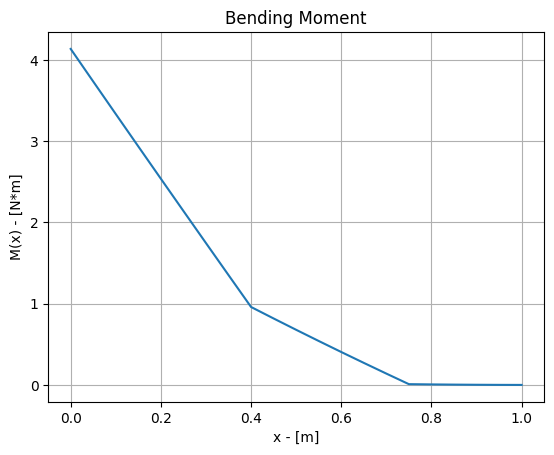

In [141]:
# Plot - Bending Moment
plt.plot(x, M)
plt.title('Bending Moment')
plt.xlabel('x - [m]')
plt.ylabel('M(x) - [N*m]')
plt.grid(True)

In [142]:
def deflection_solver(x, M, E, I, tol=1e-10):
    """Deflection - Cantilever - Finite Difference Scheme"""
    Y = np.zeros(x.size)
    ea_Y = 1
    while ea_Y > tol:
        Y_1 = Y.sum()
        Y[2:] = 2 * Y[1:-1] - Y[0:-2] + (M[2:] / (E * I[2:])) * (x[1] - x[0]) ** 2
        ea_Y = (Y.sum() - Y_1) / (Y.sum())
        ea_Y = np.abs(ea_Y)
    return -1 * Y

In [143]:
# Deflection
Y = deflection_solver(x, M, E, I)

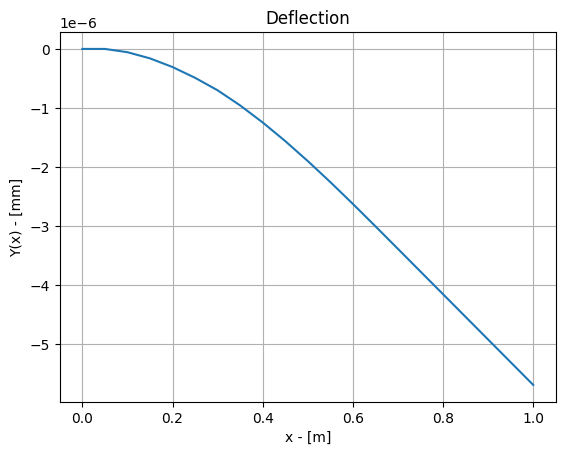

In [144]:
# Plot - Deflection
plt.plot(x, Y/1000)
plt.title('Deflection')
plt.xlabel('x - [m]')
plt.ylabel('Y(x) - [mm]')
plt.grid(True)